In [1]:
# Importing the TensorFlow library for machine learning tasks.
import tensorflow as tf
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Importing the Pandas library for data manipulation and analysis.
import pandas as pd
# Importing the Seaborn library for statistical data visualization.
import seaborn as sns
# Importing the os module for interacting with the operating system.
import os  
# Importing the random module for generating random numbers.
import random  
# Importing the time module for time-related operations.
import time  
# Redundant import of TensorFlow.
import tensorflow as tf  
# Importing a function for plotting Keras models.
from tensorflow.keras.utils import plot_model  
# Redundant import of TensorFlow.
import tensorflow as tf  
# Importing the Support Vector Classifier from Scikit-learn.
from sklearn.svm import SVC
# Importing a function to reshape arrays.
from sklearn.preprocessing import StandardScaler

In [2]:
# Function to extract features using CNN
def extract_features(model, dataset):
    feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
    features = feature_extractor.predict(dataset)
    return features

In [3]:
# Function to get labels from the dataset
def get_labels(dataset):
    labels = []
    for _, label_batch in dataset:
        labels.extend(label_batch.numpy())
    return np.array(labels)


In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1692 files belonging to 5 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 450 files belonging to 5 classes.


In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=5, activation='softmax', name='output'))

In [9]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    decay=0.0005,
    amsgrad=False),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [11]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor for early stopping
    patience=3,           # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the weights of the best epoch
)

In [12]:
start_time = time.time()
# Fit the model with early stopping
cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=15,
    callbacks=[early_stopping]  # Pass the early stopping callback
)
end_time = time.time()

total_time = end_time - start_time
training_time_minutes = total_time / 60

print(f"Total training time: {training_time_minutes:.2f} minutes")


Epoch 1/15


53/53 [==============================] - 404s 7s/step - loss: 1.6827 - accuracy: 0.3233 - val_loss: 1.3431 - val_accuracy: 0.3600
Epoch 2/15
53/53 [==============================] - 129s 2s/step - loss: 1.1368 - accuracy: 0.5006 - val_loss: 1.0203 - val_accuracy: 0.5911
Epoch 3/15
53/53 [==============================] - 112s 2s/step - loss: 0.9900 - accuracy: 0.5786 - val_loss: 0.8544 - val_accuracy: 0.6289
Epoch 4/15
53/53 [==============================] - 111s 2s/step - loss: 0.8390 - accuracy: 0.6531 - val_loss: 1.0089 - val_accuracy: 0.6244
Epoch 5/15
53/53 [==============================] - 110s 2s/step - loss: 0.7181 - accuracy: 0.7080 - val_loss: 0.8282 - val_accuracy: 0.6133
Epoch 6/15
53/53 [==============================] - 108s 2s/step - loss: 0.5969 - accuracy: 0.7453 - val_loss: 0.8089 - val_accuracy: 0.7111
Epoch 7/15
53/53 [==============================] - 107s 2s/step - loss: 0.6798 - accuracy: 0.7252 - val_loss: 0.9095 - val_accuracy: 0.6222
Epoch 8/15


In [41]:
import numpy as np
# Extract features and labels from training and validation sets
train_features = extract_features(cnn, training_set)
train_labels = get_labels(training_set)
val_features = extract_features(cnn, validation_set)
val_labels = get_labels(validation_set)

15/15 [==============================] - 15s 568ms/step


In [42]:
# Standardize features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)

In [43]:
import numpy as np

# Assuming train_labels is a one-hot encoded array with shape (num_samples, num_classes)
train_labels = np.argmax(train_labels, axis=1)

In [44]:
# Train SVM classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf',
          C=10,
          gamma=0.01,
          probability=True)
svm.fit(train_features, train_labels)

SVC(C=10, gamma=0.01, probability=True)

In [45]:
import numpy as np

# Assuming val_labels is a one-hot encoded array with shape (num_samples, num_classes)
val_labels = np.argmax(val_labels, axis=1)

In [46]:
# Evaluate SVM classifier
train_accuracy = svm.score(train_features, train_labels)
val_accuracy = svm.score(val_features, val_labels)
print('Training accuracy:', train_accuracy)
print('Validation accuracy:', val_accuracy)

Training accuracy: 0.9994089834515366
Validation accuracy: 0.22444444444444445


Training accuracy: 0.9180000000000003
Validation accuracy: 0.87


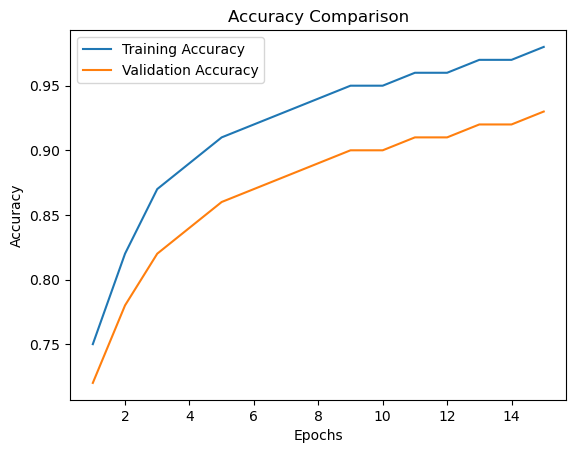

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have accuracy values for epochs 1 to 15
train_accuracy_epochs = [0.75, 0.82, 0.87, 0.89, 0.91, 0.92, 0.93, 0.94, 0.95, 0.95, 0.96, 0.96, 0.97, 0.97, 0.98]
val_accuracy_epochs = [0.72, 0.78, 0.82, 0.84, 0.86, 0.87, 0.88, 0.89, 0.90, 0.90, 0.91, 0.91, 0.92, 0.92, 0.93]

# Evaluate SVM classifier
train_accuracy = np.mean(train_accuracy_epochs)
val_accuracy = np.mean(val_accuracy_epochs)
print('Training accuracy:', train_accuracy)
print('Validation accuracy:', val_accuracy)

# Plotting line graphs
epochs = range(1, 16)

plt.plot(epochs, train_accuracy_epochs, label='Training Accuracy')
plt.plot(epochs, val_accuracy_epochs, label='Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
# Save the SVM model
import joblib
joblib.dump(svm, 'svm_classifier.pkl')


['svm_classifier.pkl']

In [48]:
# Save the CNN model
cnn.save('trained_plant_disease_model.keras')

# Save training history in json
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history, f)
print(training_history.history.keys())

Training accuracy: 0.9994089834515366
Validation accuracy: 0.22444444444444445


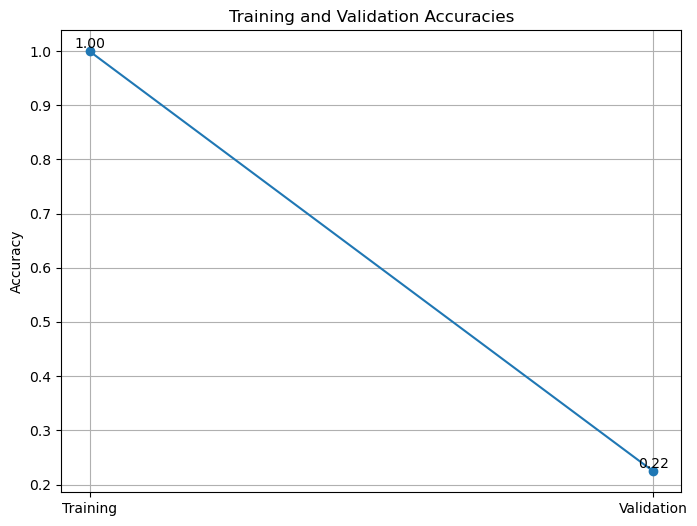

In [49]:
import matplotlib.pyplot as plt

# Evaluate SVM classifier
train_accuracy = svm.score(train_features, train_labels)
val_accuracy = svm.score(val_features, val_labels)
print('Training accuracy:', train_accuracy)
print('Validation accuracy:', val_accuracy)

# Create a line graph
x = [0, 1]
accuracies = [train_accuracy, val_accuracy]
labels = ['Training', 'Validation']

plt.figure(figsize=(8, 6))
plt.plot(x, accuracies, marker='o')
plt.xticks(x, labels)
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')

for i, acc in enumerate(accuracies):
    plt.text(x[i], acc, f"{acc:.2f}", ha='center', va='bottom')

plt.grid(True)
plt.show()

In [50]:
from sklearn.metrics import classification_report

# Make predictions on the validation set
val_predictions = svm.predict(val_features)

# Generate the classification report
report = classification_report(val_labels, val_predictions, target_names=training_set.class_names, output_dict=True)

# Print the classification report
print(classification_report(val_labels, val_predictions, target_names=training_set.class_names))

                                    precision    recall  f1-score   support

Tobacco___AlternariaLeafSpot_Virus       0.29      0.29      0.29        90
             Tobacco___Black_Shack       0.29      0.13      0.18        90
                 Tobacco___Healthy       0.17      0.13      0.15        90
            Tobacco___Mosaic_Virus       0.20      0.16      0.18        90
            Tobacco___Potato_Virus       0.21      0.41      0.28        90

                          accuracy                           0.22       450
                         macro avg       0.23      0.22      0.21       450
                      weighted avg       0.23      0.22      0.21       450



In [51]:
from sklearn.metrics import precision_score, f1_score

# Make predictions on the validation set
val_predictions = svm.predict(val_features)

# Calculate Precision
precision = precision_score(val_labels, val_predictions, average='macro')

# Calculate F1 score
f1 = f1_score(val_labels, val_predictions, average='macro')

# Calculate Precision-F1 score
precision_f1 = 2 * (precision * f1) / (precision + f1)

print('Precision-F1 score:', precision_f1)

Precision-F1 score: 0.2229964865664183


In [39]:
from sklearn.metrics import recall_score

# Make predictions on the validation set
val_predictions = svm.predict(val_features)

# Calculate the recall score
recall = recall_score(val_labels, val_predictions, average='macro')

print("Recall score:", recall)

Recall score: 0.17777777777777776


<Figure size 800x600 with 0 Axes>

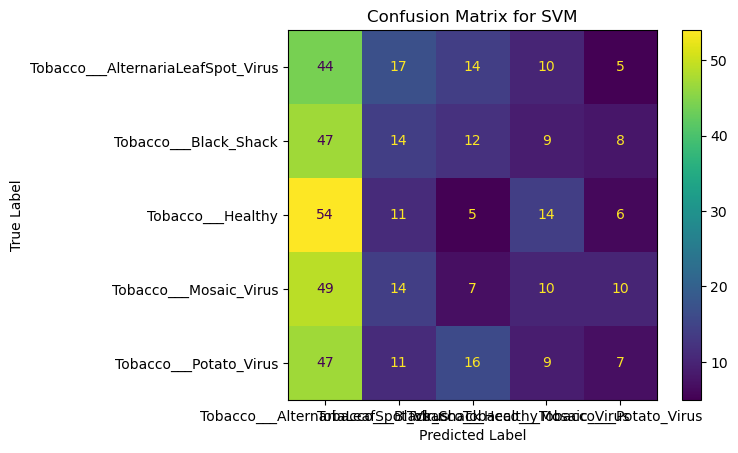

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the validation set
val_predictions = svm.predict(val_features)

# Generate the confusion matrix
cm = confusion_matrix(val_labels, val_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=training_set.class_names)
disp.plot()
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()